# Cleaning Data with Pandas

In [74]:
import pandas as pd
import numpy as np
import datetime as dt
import os

In [75]:
datasets_cwd = f"{os.getcwd()}\\datasets"

*Dataset: Bicycle Ride Sharing Data In San Francisco*

In [76]:
df = pd.read_csv(f"{datasets_cwd}\\ride_sharing_san_fran.csv")
df.drop(columns=["Unnamed: 0"], inplace=True) # remove duplicate index column
df

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...
25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


## Fixing Data Type Inconsistencies

### Change user_type column from numerical to categorial data type

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

`1` for free riders.

`2` for pay per ride.

`3` for monthly subscribers.


In [77]:
df["user_type"].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

In [78]:
df["user_type"] = df["user_type"].astype("category")

In [79]:
df["user_type"].describe()

count     25760
unique        3
top           2
freq      12972
Name: user_type, dtype: int64

### Removing extraneous strings from numerical columns

In [80]:
df["duration"]

0        12 minutes
1        24 minutes
2         8 minutes
3         4 minutes
4        11 minutes
            ...    
25755    11 minutes
25756    10 minutes
25757    14 minutes
25758    14 minutes
25759    29 minutes
Name: duration, Length: 25760, dtype: object

In [81]:
duration_col_index = df.columns.get_loc("duration")

numerical_duration_values = df["duration"].str.strip("minutes")

# insert new duration column
df.insert(duration_col_index+1, "duration_time", numerical_duration_values)

df["duration_time"] = df["duration_time"].astype("int")

df

,duration,duration_time,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,4,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,11,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...,...
25755,11 minutes,11,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,10 minutes,10,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,14 minutes,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,14 minutes,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


In [82]:
df[["duration", "duration_time"]]

,duration,duration_time
0,12 minutes,12
1,24 minutes,24
2,8 minutes,8
3,4 minutes,4
4,11 minutes,11
...,...,...
25755,11 minutes,11
25756,10 minutes,10
25757,14 minutes,14
25758,14 minutes,14


In [83]:
df["duration_time"].mean()

11.389052795031056

## Size/Outlier Constraints

*Set max size of `tire_sizes` to 27*

In [84]:
df2 = pd.read_csv(f"{datasets_cwd}\\ride_sharing_san_fran_tire_sizes.csv")
df2.drop(columns=["Unnamed: 0"], inplace=True) # remove duplicate index column
df2

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,Subscriber,1959,Male,27.0
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Subscriber,1965,Male,26.0
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Subscriber,1993,Male,26.0
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,Subscriber,1979,Male,29.0
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,Subscriber,1994,Male,27.0
...,...,...,...,...,...,...,...,...,...,...
25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,Subscriber,2000,Male,29.0
25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,Subscriber,1998,Male,26.0
25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,Customer,1995,Male,29.0
25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,Customer,1995,Male,26.0


In [85]:
# temporarily convert to int
df2["tire_sizes"] = df2["tire_sizes"].astype("int")
print(f"OLD MAX TIRE SIZE: {df2['tire_sizes'].max()}")

# set all values above 27 to 27
df2.loc[df2["tire_sizes"] > 27, "tire_sizes"] = 27
print(f"NEW MAX TIRE SIZE: {df2['tire_sizes'].max()}")

# temporai
df2["tire_sizes"] = df2["tire_sizes"].astype("category")


print(df2["tire_sizes"])

OLD MAX TIRE SIZE: 29
NEW MAX TIRE SIZE: 27
0        27
1        26
2        26
3        27
4        27
         ..
25755    27
25756    26
25757    27
25758    26
25759    27
Name: tire_sizes, Length: 25760, dtype: category
Categories (2, int64): [26, 27]


## Date Range Constraints

*Change the future `ride_date` dates to today's date*

In [86]:
df3 = pd.read_csv(f"{datasets_cwd}\\ride_sharing_san_fran_ride_dates.csv")
df3.drop(columns=["Unnamed: 0"], inplace=True) # remove duplicate index column
df3

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,Subscriber,1959,Male,27.0,2020-01-19
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Subscriber,1965,Male,26.0,2018-10-24
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Subscriber,1993,Male,26.0,2017-12-25
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,Subscriber,1979,Male,29.0,2025-08-14
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,Subscriber,1994,Male,27.0,2019-01-29
...,...,...,...,...,...,...,...,...,...,...,...
25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,Subscriber,2000,Male,29.0,2017-10-25
25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,Subscriber,1998,Male,26.0,2019-04-05
25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,Customer,1995,Male,29.0,2018-11-29
25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,Customer,1995,Male,26.0,2017-08-09


In [87]:
df3["ride_date"] = pd.to_datetime(df3["ride_date"]).dt.date
df3.loc[df3["ride_date"] > dt.date.today(), "ride_date"]

3        2025-08-14
18       2025-08-14
23       2025-08-14
25       2025-08-14
29       2025-08-14
            ...    
25734    2025-08-14
25741    2025-08-14
25745    2025-08-14
25746    2025-08-14
25753    2025-08-14
Name: ride_date, Length: 5534, dtype: object

In [88]:
# convert new ride_date column to datetime type
df3["ride_dt"] = pd.to_datetime(df3["ride_date"]).dt.date
print(f"OLD MAX RIDE DATE: {df3['ride_dt'].max()}")

# today's date
today = dt.date.today()

# set future ride dates to today's date
df3.loc[df3["ride_dt"] > today, "ride_dt"] = today
print(f"NEW MAX RIDE DATE: {df3['ride_dt'].max()}")

print(df3["ride_dt"])


OLD MAX RIDE DATE: 2025-08-14
NEW MAX RIDE DATE: 2024-09-09
0        2020-01-19
1        2018-10-24
2        2017-12-25
3        2024-09-09
4        2019-01-29
            ...    
25755    2017-10-25
25756    2019-04-05
25757    2018-11-29
25758    2017-08-09
25759    2019-10-30
Name: ride_dt, Length: 25760, dtype: object


## Dealing with Duplicate Records

In [89]:
df4 = pd.read_csv(f"{datasets_cwd}\\ride_sharing_san_fran_duplicates.csv")
df4.drop(columns=["Unnamed: 0"], inplace=True) # remove duplicate index column
df4

,ride_id,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date
0,0,11,16,Steuart St at Market St,93,4th St at Mission Bay Blvd S,5504,Subscriber,1988,Male,27,2018-03-04
1,1,8,3,Powell St BART Station (Market St at 4th St),93,4th St at Mission Bay Blvd S,2915,Subscriber,1988,Male,27,2017-03-27
2,2,11,15,San Francisco Ferry Building (Harry Bridges Pl...,67,San Francisco Caltrain Station 2 (Townsend St...,5340,Customer,1988,Male,26,2019-06-30
3,3,7,21,Montgomery St BART Station (Market St at 2nd St),50,2nd St at Townsend St,746,Subscriber,1969,Male,27,2018-11-16
4,4,11,81,Berry St at 4th St,21,Montgomery St BART Station (Market St at 2nd St),5477,Subscriber,1986,Male,26,2017-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...
73,99,15,30,San Francisco Caltrain (Townsend St at 4th St),14,Clay St at Battery St,1194,Subscriber,1968,Male,27,2018-11-11
74,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03
75,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03
76,89,9,15,San Francisco Ferry Building (Harry Bridges Pl...,81,Berry St at 4th St,5552,Subscriber,1986,Male,26,2018-09-09


### `pd.DataFrame.duplicated()`: returns duplicated rows in DataFrame
* Parameters:
    * `subset`: a list of columns that will be used to determine the duplicate rows
    * `keep`: 
        * `first` -- marks everything EXCEPT the FIRST occurrence of a duplicate row as `True`
            * e.g. row A, row B, and row C are duplicates, only rows B & C will be marked as `True`
        * `last` -- marks everything EXCEPT the LAST occurrence of a duplicate row as `True`
            * e.g. row A, row B, and row C are duplicates, only rows A & B will be marked as `True`
        * `False` -- marks all duplicate rows, INCLUDING the first occurrence, as `True`
            * e.g. row A, row B, and row C are duplicates, all rows will be marked as `True`

In [90]:
duplicates = df4.duplicated(subset=["ride_id"], keep=False)
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
73    False
74     True
75     True
76     True
77     True
Length: 78, dtype: bool


In [91]:
# sort rows by ride_id
duplicate_rows = df4[duplicates].sort_values(by="ride_id")

duplicate_rows

,ride_id,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date
22,33,10,30,San Francisco Caltrain (Townsend St at 4th St),59,S Van Ness Ave at Market St,5022,Subscriber,1979,Male,27,2019-07-06
39,33,2,30,San Francisco Caltrain (Townsend St at 4th St),59,S Van Ness Ave at Market St,5022,Subscriber,1979,Male,27,2019-07-06
53,55,9,3,Powell St BART Station (Market St at 4th St),115,Jackson Playground,4343,Subscriber,1985,Male,27,2017-08-12
65,55,9,3,Powell St BART Station (Market St at 4th St),115,Jackson Playground,4343,Subscriber,1985,Male,27,2017-08-12
74,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03
75,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03
76,89,9,15,San Francisco Ferry Building (Harry Bridges Pl...,81,Berry St at 4th St,5552,Subscriber,1986,Male,26,2018-09-09
77,89,9,15,San Francisco Ferry Building (Harry Bridges Pl...,81,Berry St at 4th St,5552,Subscriber,2060,Male,26,2018-09-09


In [92]:
duplicate_rows[["ride_id", "duration", "user_birth_year"]]

,ride_id,duration,user_birth_year
22,33,10,1979
39,33,2,1979
53,55,9,1985
65,55,9,1985
74,71,11,1997
75,71,11,1997
76,89,9,1986
77,89,9,2060


*Remove duplicate rows and merge incomplete duplicate rows by taking average duration*

### `pd.DataFrame.drop_duplicates()`: drops duplicate rows
* same parameters as `.duplicated()`, but for `keep`:
    * `first` (DEFAULT): Drop duplicates except for the first occurrence.
    * `last`: Drop duplicates except for the last occurrence.
    * `False`: Drop all duplicates.

*If no args given to `.drop_duplicates()`, duplicate rows will be determined by every column (complete duplicates) and only the first occurrence of the duplicate row will be kept, subsequent duplicate rows will be dropped*

In [93]:
complete_duplicates = df4.duplicated(keep=False)

df4[complete_duplicates]

,ride_id,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date
53,55,9,3,Powell St BART Station (Market St at 4th St),115,Jackson Playground,4343,Subscriber,1985,Male,27,2017-08-12
65,55,9,3,Powell St BART Station (Market St at 4th St),115,Jackson Playground,4343,Subscriber,1985,Male,27,2017-08-12
74,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03
75,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03


In [94]:
ride_dup = df4.drop_duplicates()

duplicate_rows = df4[duplicates].sort_values(by="ride_id")

incomplete_dup_ride_ids = list(duplicate_rows["ride_id"].unique())

duplicate_rows

,ride_id,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date
22,33,10,30,San Francisco Caltrain (Townsend St at 4th St),59,S Van Ness Ave at Market St,5022,Subscriber,1979,Male,27,2019-07-06
39,33,2,30,San Francisco Caltrain (Townsend St at 4th St),59,S Van Ness Ave at Market St,5022,Subscriber,1979,Male,27,2019-07-06
53,55,9,3,Powell St BART Station (Market St at 4th St),115,Jackson Playground,4343,Subscriber,1985,Male,27,2017-08-12
65,55,9,3,Powell St BART Station (Market St at 4th St),115,Jackson Playground,4343,Subscriber,1985,Male,27,2017-08-12
74,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03
75,71,11,3,Powell St BART Station (Market St at 4th St),44,Civic Center/UN Plaza BART Station (Market St ...,4805,Customer,1997,Male,27,2018-02-03
76,89,9,15,San Francisco Ferry Building (Harry Bridges Pl...,81,Berry St at 4th St,5552,Subscriber,1986,Male,26,2018-09-09
77,89,9,15,San Francisco Ferry Building (Harry Bridges Pl...,81,Berry St at 4th St,5552,Subscriber,2060,Male,26,2018-09-09


### `.groupby()` [(Docs)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
* if only a single arg is passed, this should be the column name

### `.agg()` [(Docs)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)
* a dictionary of column names to aggregations methods can be passed in to do aggregations on the specified columns
* e.g. `{"column1": ["mean", "min"], "column2": "max"}`

In [95]:
aggregations = {
    "user_birth_year": "min",
    "duration": "mean"
}

# group by ride_id and perform specified aggregations
ride_unique = ride_dup.groupby("ride_id").agg(aggregations).reset_index()

ride_unique

,ride_id,user_birth_year,duration
0,0,1988,11.0
1,1,1988,8.0
2,2,1988,11.0
3,3,1969,7.0
4,4,1986,11.0
...,...,...,...
69,94,1993,25.0
70,95,1959,11.0
71,96,1991,7.0
72,98,1989,21.0


*New (averaged) durations by ride_id*

In [96]:
ride_unique.loc[ride_unique["ride_id"].isin(incomplete_dup_ride_ids)]

,ride_id,user_birth_year,duration
22,33,1979,6.0
39,55,1985,9.0
53,71,1997,11.0
65,89,1986,9.0


*Check to make sure there are no more duplicates*

In [97]:
duplicates = ride_unique.duplicated(subset="ride_id", keep=False)

print(ride_unique[duplicates])

Empty DataFrame
Columns: [ride_id, user_birth_year, duration]
Index: []


## Categorical Inconsistencies

In [98]:
airlines_df = pd.read_csv(f"{datasets_cwd}\\airlines_san_fran.csv")
airlines_df

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satisfied
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Unacceptable,Very safe,Somewhat satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satisfied
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


In [99]:
airlines_survey_categories_df = pd.read_csv(f"{datasets_cwd}\\airlines_survey_categories.csv")
airlines_survey_categories_df

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


### Fix inconsistency with `cleanliness` column

In [100]:
unique_cleanliness_scores = airlines_df['cleanliness'].unique()
print(f"Unique cleanliness categories in DataFrame: {unique_cleanliness_scores}")

inconsistent_cleanliness_score = airlines_df["cleanliness"].loc[~airlines_df["cleanliness"].isin(airlines_survey_categories_df["cleanliness"])].unique()
print(f"Inconsistent score: {inconsistent_cleanliness_score}")

Unique cleanliness categories in DataFrame: ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty']
Inconsistent score: ['Unacceptable']


In [101]:
inconsistent_cleanliness_score = set(airlines_df["cleanliness"]).difference(airlines_survey_categories_df["cleanliness"])
print(inconsistent_cleanliness_score)

{'Unacceptable'}


In [102]:
inconsistent_cleanliness_rows = airlines_df["cleanliness"].isin(inconsistent_cleanliness_score)

airlines_df[inconsistent_cleanliness_rows]

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Unacceptable,Very safe,Somewhat satisfied
17,2913,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,225.0,Unacceptable,Very safe,Somewhat satisfied
89,2321,Wednesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,130.0,Unacceptable,Somewhat safe,Somewhat satisfied


*Show rows with only consistent cleanliness scores (using `~`)*

In [103]:
airlines_df[~inconsistent_cleanliness_rows]

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satisfied
5,634,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,2018-12-31,140.0,Somewhat clean,Very safe,Very satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satisfied
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


## Value Inconsistencies

e.g. `"married"`, `"    married"`, `"Maried"`, `"MARRIED"`, `"recently married"`

In [104]:
airlines_inconsistencies_df = pd.read_csv(f"{datasets_cwd}\\airlines_san_fran_inconsistencies.csv")
airlines_inconsistencies_df

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


In [105]:
print(airlines_inconsistencies_df["dest_region"].unique())
print()
print(airlines_inconsistencies_df["dest_size"].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [106]:
# set dest_region to all lowercase
airlines_inconsistencies_df["dest_region"] = airlines_inconsistencies_df["dest_region"].str.lower()

# replace "eur" with "europe"
airlines_inconsistencies_df["dest_region"] = airlines_inconsistencies_df["dest_region"].replace({"eur": "europe"})


print(airlines_inconsistencies_df["dest_region"].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [107]:
# strip trailing whitespaces in dest_size
airlines_inconsistencies_df["dest_size"] = airlines_inconsistencies_df["dest_size"].str.strip()

print(airlines_inconsistencies_df["dest_size"].unique())

['Hub' 'Small' 'Medium' 'Large']


### Unit/Currency Inconsistencies

*convert euro currencies to USD to keep consistency/uniformity*

In [108]:
banking_df = pd.read_csv(f"{datasets_cwd}\\banking_transactions.csv")
banking_df

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,dollar,35500.50,03-05-18,30-09-19
1,D5536652,86506.85,dollar,81921.86,21-01-18,14-01-19
2,A631984D,77799.33,dollar,46412.27,26-01-18,06-10-19
3,93F2F951,93875.24,euro,76563.35,21-08-17,10-07-19
4,DE0A0882,99998.35,euro,18669.01,05-06-17,15-01-19
...,...,...,...,...,...,...
92,CEC1CAE5,92169.14,dollar,77896.86,26-11-17,08-10-18
93,4C7F8638,21942.37,dollar,11715.24,14-07-18,02-02-19
94,A81D31B3,74010.15,dollar,48787.47,02-06-18,12-09-18
95,93A17007,40651.36,dollar,9387.87,28-05-17,08-03-19


In [109]:
banking_df["acct_cur"].unique()

array(['dollar', 'euro'], dtype=object)

In [110]:
euro_transactions = banking_df["acct_cur"] == "euro"
banking_df.loc[euro_transactions]

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
3,93F2F951,93875.24,euro,76563.35,21-08-17,10-07-19
4,DE0A0882,99998.35,euro,18669.01,05-06-17,15-01-19
7,984403B9,17939.88,euro,14429.59,07-10-17,18-05-18
9,166B05B0,38175.46,euro,15052.70,28-02-19,31-10-18
13,9A9BB390,83653.09,euro,44656.36,15-08-18,18-01-19
16,472341F2,83127.65,euro,67961.74,14-12-18,22-04-18
17,D3287768,89961.77,euro,84216.09,03-09-18,19-10-18
19,A69FA1B8,75207.99,euro,31620.86,23-02-19,09-09-19
22,7A73F334,120512.00,euro,93233.00,14-05-18,19-07-18
23,B40E8497,99771.90,euro,86992.74,16-05-17,05-01-20


In [111]:
# convert euro to USD (multiply by 1.1)
banking_df.loc[euro_transactions, "acct_amount"] = banking_df.loc[euro_transactions, "acct_amount"] * 1.1

# update currency column for euro (change to "dollar")
banking_df.loc[euro_transactions, "acct_cur"] = "dollar"

In [112]:
banking_df["acct_cur"].unique()

array(['dollar'], dtype=object)

### Date Inconsistencies

In [113]:
banking_dates_df = pd.read_csv(f"{datasets_cwd}\\banking_transactions_dates.csv")
banking_dates_df

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,8C35540A,44244.710,dollar,35500.50,2018-03-05,30-09-19
1,D5536652,86506.850,dollar,81921.86,21-01-18,14-01-19
2,A631984D,77799.330,dollar,46412.27,"January 26, 2018",06-10-19
3,93F2F951,103262.764,dollar,76563.35,21-14-17,10-07-19
4,DE0A0882,109998.185,dollar,18669.01,05-06-17,15-01-19
...,...,...,...,...,...,...
92,CEC1CAE5,92169.140,dollar,77896.86,26-11-17,08-10-18
93,4C7F8638,21942.370,dollar,11715.24,14-07-18,02-02-19
94,A81D31B3,74010.150,dollar,48787.47,02-06-18,12-09-18
95,93A17007,40651.360,dollar,9387.87,28-05-17,08-03-19


In [114]:
banking_dates_df["account_opened"].head()

0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object

*replace errornous dates (e.g. 21-14-17) with a missing value (`NaT`)*

In [115]:
banking_dates_df["account_opened"] = pd.to_datetime(
    banking_dates_df["account_opened"],
    infer_datetime_format=True,
    errors="coerce"
)

banking_dates_df["account_opened"].head()

0   2018-03-05
1   2018-01-21
2   2018-01-26
3          NaT
4   2017-05-06
Name: account_opened, dtype: datetime64[ns]

*extract year of `account_opened` column and assign it to new column: `acct_year*

In [116]:
banking_dates_df["acct_year"] = banking_dates_df["account_opened"].dt.strftime("%Y")

banking_dates_df[["account_opened", "acct_year"]]

,account_opened,acct_year
0,2018-03-05,2018
1,2018-01-21,2018
2,2018-01-26,2018
3,NaT,NaN
4,2017-05-06,2017
...,...,...
92,2017-11-26,2017
93,2018-07-14,2018
94,2018-02-06,2018
95,2017-05-28,2017


## Extremely Large Category Groups

e.g. household income categories being divided to just "poor" and "rich" vs income brackets

<i>
create two new categorical variables:

* `wait_type`: `'short'` for 0-60 min, `'medium'` for 60-180 and long for 180+
* `day_week`: `'weekday'` if day is in the weekday, `'weekend'` if day is in the weekend.
</i>

In [117]:
airlines_remap_categories_df = pd.read_csv(f"{datasets_cwd}\\airlines_san_fran_remap_categories.csv")
airlines_remap_categories_df

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


*separating categories into bins using `pd.cut()`*

In [118]:
label_ranges = [0, 60, 180, np.inf]
label_names = ["short", "medium", "long"]

airlines_remap_categories_df["wait_type"] = pd.cut(
    airlines_remap_categories_df["wait_min"],
    bins=label_ranges,
    labels=label_names
)

airlines_remap_categories_df[["wait_min", "wait_type"]]

,wait_min,wait_type
0,115.0,medium
1,135.0,medium
2,70.0,medium
3,190.0,long
4,559.0,long
...,...,...
2472,280.0,long
2473,165.0,medium
2474,92.0,medium
2475,95.0,medium


## Combine Category Groups

e.g. various specific Android and iOS model phones into "Android" and "iOS"

*combining categories with `.replace()`*

In [119]:
day_mappings = {
    "Monday":"weekday", 
    "Tuesday":"weekday", 
    "Wednesday": "weekday", 
    "Thursday": "weekday", 
    "Friday": "weekday", 
    "Saturday": "weekend", 
    "Sunday": "weekend"
}

airlines_remap_categories_df["day_week"] = airlines_remap_categories_df["day"].replace(day_mappings)

airlines_remap_categories_df[["day", "day_week"]]

,day,day_week
0,Tuesday,weekday
1,Friday,weekday
2,Thursday,weekday
3,Tuesday,weekday
4,Wednesday,weekday
...,...,...
2472,Tuesday,weekday
2473,Thursday,weekday
2474,Friday,weekday
2475,Tuesday,weekday


## Replace Strings

### *remove honorifics (Dr., Mr., Ms., Miss) using `str.replace()`*

In [120]:
airlines_remove_honorifics_df = pd.read_csv(f"{datasets_cwd}\\airlines_san_fran_str_replace.csv")
airlines_remove_honorifics_df

,id,full_name,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Melodie Stuart,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Dominic Shannon,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Quintessa Tillman,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Dr. Christine Nicholson,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Regina Clements,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,819,Ms. Vanna Rivera,Sunday,ALASKA,PORTLAND,West US,Medium,Gates 50-59,2018-12-31,80.0,Somewhat clean,Neutral,Neutral
196,2924,Miss Venus Lowe,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,205.0,Somewhat clean,Somewhat safe,Somewhat satsified
197,2245,Amethyst Nieves,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,140.0,Average,Somewhat safe,Somewhat satsified
198,238,Miss Vivian Foreman,Wednesday,AMERICAN,LOS ANGELES,West US,Hub,Gates 50-59,2018-12-31,115.0,Somewhat clean,Very safe,Somewhat satsified


In [121]:
airlines_remove_honorifics_df["full_name"]

0               Melodie Stuart
1              Dominic Shannon
2            Quintessa Tillman
3      Dr. Christine Nicholson
4              Regina Clements
                ...           
195           Ms. Vanna Rivera
196            Miss Venus Lowe
197            Amethyst Nieves
198        Miss Vivian Foreman
199         Miss Wendy Griffin
Name: full_name, Length: 200, dtype: object

In [122]:
airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace("Dr. ", "")
airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace("Mr.", "")
airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace("Ms.", "")
airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace("Miss", "")
airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.strip()

airlines_remove_honorifics_df["full_name"]

C:\Users\prisc\AppData\Local\Temp\ipykernel_15044\1753778572.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace("Dr. ", "")
C:\Users\prisc\AppData\Local\Temp\ipykernel_15044\1753778572.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace("Mr.", "")
C:\Users\prisc\AppData\Local\Temp\ipykernel_15044\1753778572.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace("Ms.", "")


0           Melodie Stuart
1          Dominic Shannon
2        Quintessa Tillman
3      Christine Nicholson
4          Regina Clements
              ...         
195           Vanna Rivera
196             Venus Lowe
197        Amethyst Nieves
198         Vivian Foreman
199          Wendy Griffin
Name: full_name, Length: 200, dtype: object

In [123]:
airlines_remove_honorifics_df["full_name"].str.contains("Dr.|Mr.|Ms.|Miss").any()

False

### *remove honorifics (Dr., Mr., Ms., Miss) using `str.replace()` AND regex*

In [124]:
airlines_remove_honorifics_df = pd.read_csv(f"{datasets_cwd}\\airlines_san_fran_str_replace.csv")
airlines_remove_honorifics_df["full_name"]

0               Melodie Stuart
1              Dominic Shannon
2            Quintessa Tillman
3      Dr. Christine Nicholson
4              Regina Clements
                ...           
195           Ms. Vanna Rivera
196            Miss Venus Lowe
197            Amethyst Nieves
198        Miss Vivian Foreman
199         Miss Wendy Griffin
Name: full_name, Length: 200, dtype: object

In [125]:
airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace(r"Dr.|Mr.|Ms.|Miss", "")
airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.strip()

airlines_remove_honorifics_df["full_name"]

C:\Users\prisc\AppData\Local\Temp\ipykernel_15044\4199373701.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines_remove_honorifics_df["full_name"] = airlines_remove_honorifics_df["full_name"].str.replace(r"Dr.|Mr.|Ms.|Miss", "")


0           Melodie Stuart
1          Dominic Shannon
2        Quintessa Tillman
3      Christine Nicholson
4          Regina Clements
              ...         
195           Vanna Rivera
196             Venus Lowe
197        Amethyst Nieves
198         Vivian Foreman
199          Wendy Griffin
Name: full_name, Length: 200, dtype: object

In [126]:
airlines_remove_honorifics_df["full_name"].str.contains("Dr.|Mr.|Ms.|Miss").any()

False

## Cross-Field Validation

e.g. making sure birthday column and age column match up

e.g. making sure the sum/total column matches up to the various columns that are supposed to be a part of that sum

In [127]:
banking_cross_validation_df = pd.read_csv(f"{datasets_cwd}\\banking_transactions_cross_validation.csv")
banking_cross_validation_df

,cust_id,birth_date,age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,62,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,62,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,39,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,40,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,50,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,B99CD662,1989-12-12,35,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,13770971,1984-11-29,40,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,93E78DA3,1969-12-14,55,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


### *Find transactions with inconsistent investment amounts*

In [128]:
fund_columns = ["fund_A", "fund_B", "fund_C", "fund_D"]

funds_sum = banking_cross_validation_df[fund_columns].sum(axis=1) # axis=1 for summing the rows

total_investment_equality = banking_cross_validation_df["inv_amount"] == funds_sum

consistent_investment_total = banking_cross_validation_df[total_investment_equality]
inconsistent_investment_total = banking_cross_validation_df[~total_investment_equality]

print(inconsistent_investment_total)

     cust_id  birth_date  age  acct_amount  inv_amount    fund_A    fund_B  \
4   7A73F334  1990-05-17   40    120512.00       93230  12158.40  51281.00   
12  EEBD980F  1990-11-20   40     57838.49       50812  18314.00   1477.00   
22  96525DA6  1992-11-23   32     82511.24       33927   8206.00  15019.00   
43  38B8CD9C  1970-06-25   54     28834.71       27531    314.00   6072.28   
47  68C55974  1962-07-08   62     95038.14       66796  33764.00   5042.00   
65  0A9BA907  1966-09-21   58     90469.53       70171  28615.00  21720.05   
89  C580AE41  1968-06-01   56     96673.37       68466   8489.36  28592.00   
92  A07D5C92  1990-09-20   34     99577.36       60407   6467.00  20861.00   

      fund_C    fund_D account_opened last_transaction  
4   13434.00  18383.00       14-05-18         19-07-18  
12  29049.48   5539.00       08-12-18         04-01-20  
22   5559.60   6182.00       23-07-18         07-08-18  
43  14163.00   7908.00       17-09-18         05-02-20  
47  10659.00

In [129]:
inconsistent_investment_total["ACTUAL_inv_amount"] = inconsistent_investment_total[fund_columns].sum(axis=1)

inconsistent_investment_total[["cust_id", "inv_amount", "ACTUAL_inv_amount"]]

C:\Users\prisc\AppData\Local\Temp\ipykernel_15044\3752584166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inconsistent_investment_total["ACTUAL_inv_amount"] = inconsistent_investment_total[fund_columns].sum(axis=1)


,cust_id,inv_amount,ACTUAL_inv_amount
4,7A73F334,93230,95256.40
12,EEBD980F,50812,54379.48
22,96525DA6,33927,34966.60
43,38B8CD9C,27531,28457.28
47,68C55974,66796,68702.41
65,0A9BA907,70171,73004.05
89,C580AE41,68466,69939.36
92,A07D5C92,60407,63193.16


## *Confirm birth date column and age column matches correctly*

In [130]:
banking_age_verification_df = pd.read_csv(f"{datasets_cwd}\\banking_transactions_ages.csv")
banking_age_verification_df

,cust_id,birth_date,age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,62,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,62,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,39,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,40,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,50,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,B99CD662,1989-12-12,35,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,13770971,1984-11-29,40,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,93E78DA3,1969-12-14,55,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [131]:
today = dt.date.today()

banking_age_verification_df["birth_date"] = pd.to_datetime(banking_age_verification_df["birth_date"])

manual_age_calc = today.year - banking_age_verification_df["birth_date"].dt.year

age_equal = banking_age_verification_df["age"] == manual_age_calc

consistent_age_records = banking_age_verification_df[age_equal]
inconsistent_age_records = banking_age_verification_df[~age_equal]
inconsistent_age_records["ACTUAL_age"] = manual_age_calc

print(f"INCONSISTENT AGES:\n{inconsistent_age_records[['cust_id', 'birth_date', 'age', 'ACTUAL_age']]}\n")
print(f"CONSISTENT AGES:\n{consistent_age_records[['cust_id', 'birth_date', 'age']]}\n")

INCONSISTENT AGES:
     cust_id birth_date  age  ACTUAL_age
4   7A73F334 1990-05-17   40          34
6   6B094617 1977-08-26   53          47
12  EEBD980F 1990-11-20   40          34
42  E7389E60 1989-01-13   41          35

CONSISTENT AGES:
     cust_id birth_date  age
0   870A9281 1962-06-09   62
1   166B05B0 1962-12-16   62
2   BFC13E88 1990-09-12   34
3   F2158F66 1985-11-03   39
5   472341F2 1980-02-23   44
..       ...        ...  ...
95  CA507BA1 1974-08-10   50
96  B99CD662 1989-12-12   35
97  13770971 1984-11-29   40
98  93E78DA3 1969-12-14   55
99  AC91D689 1993-05-18   31

[96 rows x 3 columns]



C:\Users\prisc\AppData\Local\Temp\ipykernel_15044\3514788960.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inconsistent_age_records["ACTUAL_age"] = manual_age_calc


## Dealing With Missing Data

In [132]:
# package for visualizing missing data
import missingno as msno
import matplotlib.pyplot as plt

In [133]:
banking_missing_data_df = pd.read_csv(f"{datasets_cwd}\\banking_transactions_missing_data.csv")
banking_missing_data_df

,cust_id,age,acct_amount,inv_amount,account_opened,last_transaction
0,8C35540A,54,44244.71,35500.50,03-05-18,30-09-19
1,D5536652,36,86506.85,81921.86,21-01-18,14-01-19
2,A631984D,49,77799.33,46412.27,26-01-18,06-10-19
3,93F2F951,56,93875.24,76563.35,21-08-17,10-07-19
4,DE0A0882,21,99998.35,NaN,05-06-17,15-01-19
...,...,...,...,...,...,...
92,CEC1CAE5,32,92169.14,77896.86,26-11-17,08-10-18
93,4C7F8638,23,21942.37,NaN,14-07-18,02-02-19
94,A81D31B3,24,74010.15,NaN,02-06-18,12-09-18
95,93A17007,36,40651.36,9387.87,28-05-17,08-03-19


In [134]:
banking_missing_data_df.isna()

,cust_id,age,acct_amount,inv_amount,account_opened,last_transaction
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
92,False,False,False,False,False,False
93,False,False,False,True,False,False
94,False,False,False,True,False,False
95,False,False,False,False,False,False


### *Number of missing values by column*

In [135]:
banking_missing_data_df.isna().sum()

cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64

### *Visualizee missing data*

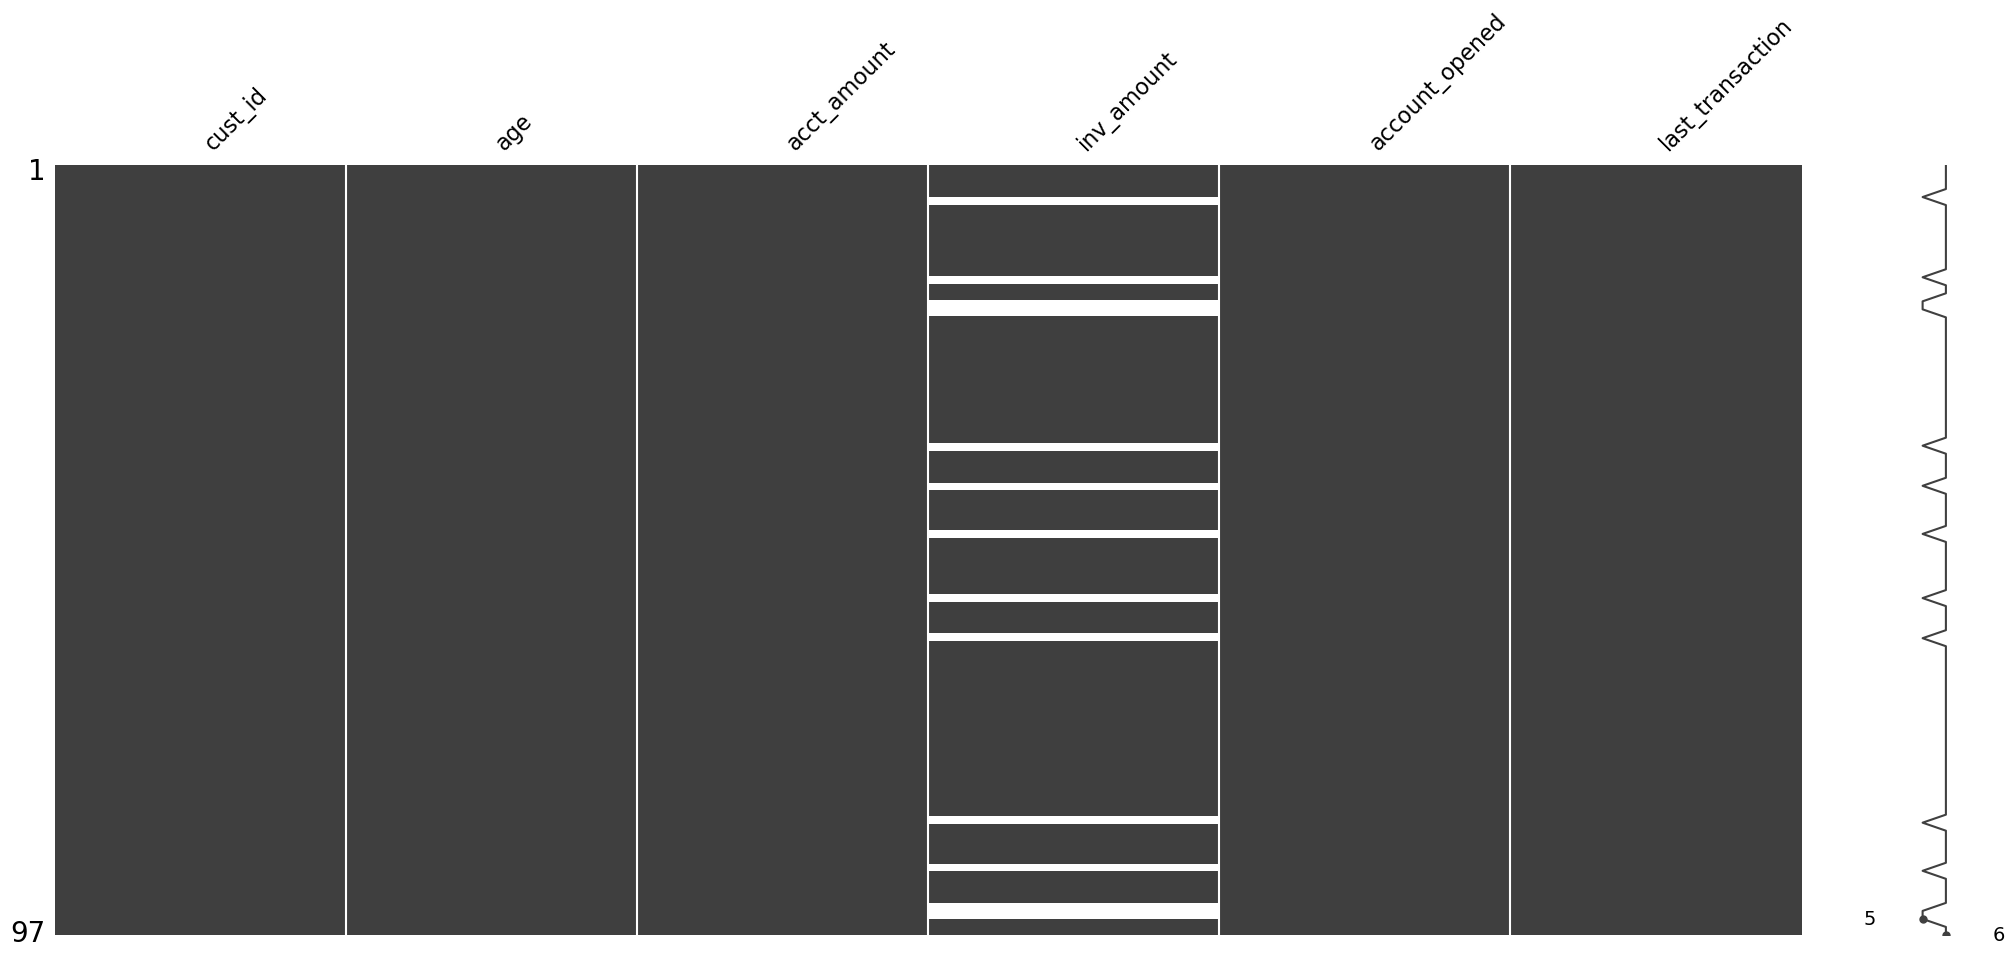

In [136]:
msno.matrix(banking_missing_data_df)
plt.show()

In [137]:
missing_inv_amount_records = banking_missing_data_df[banking_missing_data_df["inv_amount"].isna()]
complete_inv_amount_records = banking_missing_data_df[~banking_missing_data_df["inv_amount"].isna()]

In [138]:
missing_inv_amount_records.describe()

,age,acct_amount,inv_amount
count,13.000000,13.000000,0.0
mean,21.846154,73231.238462,NaN
std,1.519109,25553.327176,NaN
min,20.000000,21942.370000,NaN
25%,21.000000,66947.300000,NaN
50%,21.000000,86028.480000,NaN
75%,23.000000,89855.980000,NaN
max,25.000000,99998.350000,NaN


In [139]:
complete_inv_amount_records.describe()

,age,acct_amount,inv_amount
count,84.000000,84.000000,84.000000
mean,43.559524,75095.273214,44717.885476
std,10.411244,32414.506022,26031.246094
min,26.000000,12209.840000,3216.720000
25%,34.000000,57373.062500,22736.037500
50%,45.000000,83061.845000,44498.460000
75%,53.000000,94165.965000,66176.802500
max,59.000000,250046.760000,93552.690000


*Based on the above stats for both dataframes, the `inv_amount` is missing only for young customers, based on the avg. age of 22 and max age of 25 for the missing records verses the avg. age of 44 and max age of 59 for the complete records.*

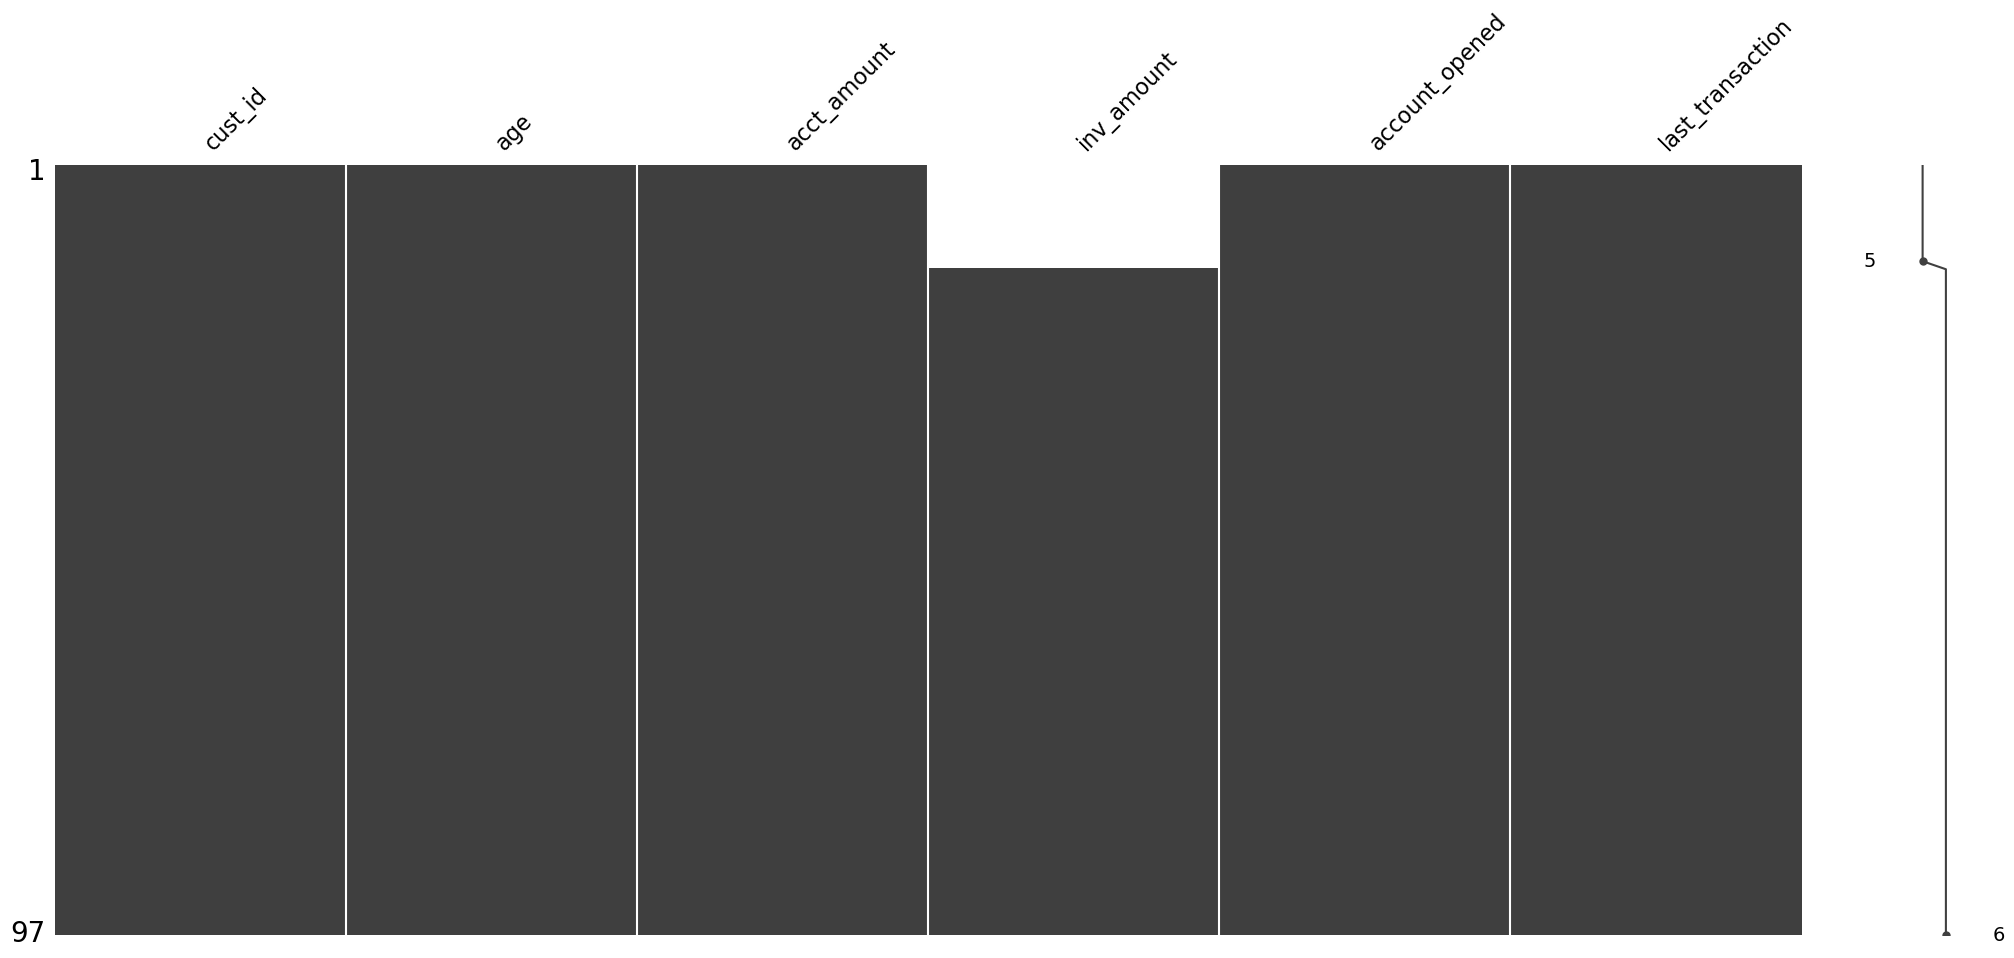

In [140]:
sorted_banking_missing_data_df = banking_missing_data_df.sort_values(by="age")

msno.matrix(sorted_banking_missing_data_df)
plt.show()

## Analysis: Unique customers and the average/estimated amounts held (remove/impute missing data)

In [141]:
banking_unique_customers_analysis_df = pd.read_csv(f"{datasets_cwd}\\banking_transactions_missing_data2.csv")
banking_unique_customers_analysis_df

,cust_id,acct_amount,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,35500.50,03-05-18,30-09-19
1,D5536652,NaN,81921.86,21-01-18,14-01-19
2,A631984D,NaN,46412.27,26-01-18,06-10-19
3,93F2F951,NaN,76563.35,21-08-17,10-07-19
4,DE0A0882,NaN,18669.01,05-06-17,15-01-19
...,...,...,...,...,...
92,CEC1CAE5,92169.14,77896.86,26-11-17,08-10-18
93,4C7F8638,21942.37,11715.24,14-07-18,02-02-19
94,A81D31B3,74010.15,48787.47,02-06-18,12-09-18
95,93A17007,40651.36,9387.87,28-05-17,08-03-19


### *Drop records with missing customer ids using `.dropna()`*

In [142]:
banking_records_complete_ids = banking_unique_customers_analysis_df.dropna(subset=["cust_id"])
banking_records_complete_ids

,cust_id,acct_amount,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,35500.50,03-05-18,30-09-19
1,D5536652,NaN,81921.86,21-01-18,14-01-19
2,A631984D,NaN,46412.27,26-01-18,06-10-19
3,93F2F951,NaN,76563.35,21-08-17,10-07-19
4,DE0A0882,NaN,18669.01,05-06-17,15-01-19
...,...,...,...,...,...
91,0B44C3F8,33984.87,31395.00,10-04-18,28-09-19
92,CEC1CAE5,92169.14,77896.86,26-11-17,08-10-18
93,4C7F8638,21942.37,11715.24,14-07-18,02-02-19
94,A81D31B3,74010.15,48787.47,02-06-18,12-09-18


### *Fill missing data using `.fillna()` in acct_amount column with an estimated amount based on inv_amount*

Sum before fillna:

In [143]:
banking_records_complete_ids["acct_amount"].sum()

5398231.23

In [144]:
acct_amount_estimation = banking_records_complete_ids["inv_amount"] * 5

banking_records_complete_amounts = banking_records_complete_ids.fillna( {"acct_amount": acct_amount_estimation} )

banking_records_complete_amounts

,cust_id,acct_amount,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,35500.50,03-05-18,30-09-19
1,D5536652,409609.30,81921.86,21-01-18,14-01-19
2,A631984D,232061.35,46412.27,26-01-18,06-10-19
3,93F2F951,382816.75,76563.35,21-08-17,10-07-19
4,DE0A0882,93345.05,18669.01,05-06-17,15-01-19
...,...,...,...,...,...
91,0B44C3F8,33984.87,31395.00,10-04-18,28-09-19
92,CEC1CAE5,92169.14,77896.86,26-11-17,08-10-18
93,4C7F8638,21942.37,11715.24,14-07-18,02-02-19
94,A81D31B3,74010.15,48787.47,02-06-18,12-09-18


Sum after fillna:

In [146]:
banking_records_complete_amounts["acct_amount"].sum()

9361233.88